# Change Classification

In [1]:
import numpy as np
import pandas as pd
import pickle
from svrimg.utils.get_tables import get_table
from svrimg.utils.get_images import get_img_list
from svrimg.mapping.map_helper import draw_box_plot, radar_norm
from svrimg.analysis.pmmean import _run_pmm_one_variable
import matplotlib.pyplot as plt
import imageio.v2 as imageio
import numpy
from scipy.interpolate import interp1d

## Join Tables

In [2]:
#download tables and images from SVRIMG
df_not_subset = get_table(which='svrimg', haz_type='tor', data_dir="/home/jcorner1/SVRIMG/data/CSVs")
#imgs = get_img_list(df_not_subset.index.values, haz_type="tor", data_dir="/home/jcorner1/SVRIMG/data", keep_missing=False)
df_not_subset

,area,convection_area,filename,intense_area,intensity_variance,kind,max_intensity,mean_intensity,radar_file,radar_time,report_time,xmax,xmin,ymax,ymin
unid,,,,,,,,,,,,,,,
199601011725z000000001,76106.2500,11995.3125,/data/haberlie/report_boxes_gridrad/tor/1996/0...,84.3750,138.131259,tor,52,11.192366,/data/haberlie/sim_4k_interp/GRIDRAD_MAXREFC/1...,1/1/1996 17:00,1/1/1996 17:25,1213,1078,247,112
199601030010z000000859,12150.0000,998.4375,/data/haberlie/report_boxes_gridrad/tor/1996/0...,182.8125,120.341792,tor,60,2.448692,/data/haberlie/sim_4k_interp/GRIDRAD_MAXREFC/1...,1/3/1996 0:00,1/3/1996 0:10,1176,1041,405,270
199601030020z000000860,12079.6875,998.4375,/data/haberlie/report_boxes_gridrad/tor/1996/0...,182.8125,120.944422,tor,60,2.425011,/data/haberlie/sim_4k_interp/GRIDRAD_MAXREFC/1...,1/3/1996 0:00,1/3/1996 0:20,1177,1042,405,270
199601031307z000000004,27393.7500,1378.1250,/data/haberlie/report_boxes_gridrad/tor/1996/0...,14.0625,84.373889,tor,54,4.590885,/data/haberlie/sim_4k_interp/GRIDRAD_MAXREFC/1...,1/3/1996 13:00,1/3/1996 13:07,1231,1096,176,41
199601031340z000000005,17100.0000,506.2500,/data/haberlie/report_boxes_gridrad/tor/1996/0...,0.0000,83.100461,tor,48,3.379163,/data/haberlie/sim_4k_interp/GRIDRAD_MAXREFC/1...,1/3/1996 14:00,1/3/1996 13:40,1234,1099,187,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201712200759z000615894,26437.5000,3164.0625,/data/haberlie/report_boxes_gridrad/tor/2017/1...,323.4375,94.803597,tor,52,6.425389,/data/haberlie/sim_4k_interp/GRIDRAD_MAXREFC/2...,12/20/2017 8:00,12/20/2017 7:59,864,729,276,141
201712200817z000615895,27309.3750,3192.1875,/data/haberlie/report_boxes_gridrad/tor/2017/1...,323.4375,98.419074,tor,52,6.401384,/data/haberlie/sim_4k_interp/GRIDRAD_MAXREFC/2...,12/20/2017 8:00,12/20/2017 8:17,870,735,278,143
201712201239z000615896,34439.0625,3093.7500,/data/haberlie/report_boxes_gridrad/tor/2017/1...,126.5625,122.735595,tor,53,6.657223,/data/haberlie/sim_4k_interp/GRIDRAD_MAXREFC/2...,12/20/2017 13:00,12/20/2017 12:39,953,818,309,174


In [3]:
#read in classification csv
df = pd.read_csv('/home/jcorner1/SVRIMG/data/tor/classifications_101623.csv')
df

,UNID,Class Code,Class Name
0,199601030010z000000859,0,isolated_cell
1,199601030020z000000860,0,isolated_cell
2,199605022300z000000295,0,isolated_cell
3,199605150140z000000715,0,isolated_cell
4,199605160408z000000190,0,isolated_cell
...,...,...,...
5784,201710082137z000615804,5,tropical
5785,201710082140z000615805,5,tropical
5786,201710082151z000615806,5,tropical
5787,201710082201z000615807,5,tropical


In [4]:
#join the SVRIMG csv with the classification csv
df = df.set_index(df["UNID"])
df_join = df.join(df_not_subset)
df_join

,UNID,Class Code,Class Name,area,convection_area,filename,intense_area,intensity_variance,kind,max_intensity,mean_intensity,radar_file,radar_time,report_time,xmax,xmin,ymax,ymin
UNID,,,,,,,,,,,,,,,,,,
199601030010z000000859,199601030010z000000859,0,isolated_cell,12150.0000,998.4375,/data/haberlie/report_boxes_gridrad/tor/1996/0...,182.8125,120.341792,tor,60,2.448692,/data/haberlie/sim_4k_interp/GRIDRAD_MAXREFC/1...,1/3/1996 0:00,1/3/1996 0:10,1176,1041,405,270
199601030020z000000860,199601030020z000000860,0,isolated_cell,12079.6875,998.4375,/data/haberlie/report_boxes_gridrad/tor/1996/0...,182.8125,120.944422,tor,60,2.425011,/data/haberlie/sim_4k_interp/GRIDRAD_MAXREFC/1...,1/3/1996 0:00,1/3/1996 0:20,1177,1042,405,270
199605022300z000000295,199605022300z000000295,0,isolated_cell,26606.2500,168.7500,/data/haberlie/report_boxes_gridrad/tor/1996/0...,28.1250,102.806528,tor,54,4.554715,/data/haberlie/sim_4k_interp/GRIDRAD_MAXREFC/1...,5/2/1996 23:00,5/2/1996 23:00,791,656,670,535
199605150140z000000715,199605150140z000000715,0,isolated_cell,11137.5000,506.2500,/data/haberlie/report_boxes_gridrad/tor/1996/0...,84.3750,58.449095,tor,52,3.661711,/data/haberlie/sim_4k_interp/GRIDRAD_MAXREFC/1...,5/15/1996 2:00,5/15/1996 1:40,721,586,407,272
199605160408z000000190,199605160408z000000190,0,isolated_cell,19673.4375,1603.1250,/data/haberlie/report_boxes_gridrad/tor/1996/0...,660.9375,70.396541,tor,65,5.541414,/data/haberlie/sim_4k_interp/GRIDRAD_MAXREFC/1...,5/16/1996 4:00,5/16/1996 4:08,673,538,619,484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201710082137z000615804,201710082137z000615804,5,tropical,116634.3750,2812.5000,/data/haberlie/report_boxes_gridrad/tor/2017/1...,0.0000,98.966033,tor,49,16.884299,/data/haberlie/sim_4k_interp/GRIDRAD_MAXREFC/2...,10/8/2017 22:00,10/8/2017 21:37,1135,1000,448,313
201710082140z000615805,201710082140z000615805,5,tropical,117028.1250,2798.4375,/data/haberlie/report_boxes_gridrad/tor/2017/1...,0.0000,98.147275,tor,49,16.938203,/data/haberlie/sim_4k_interp/GRIDRAD_MAXREFC/2...,10/8/2017 22:00,10/8/2017 21:40,1135,1000,449,314
201710082151z000615806,201710082151z000615806,5,tropical,114848.4375,2840.6250,/data/haberlie/report_boxes_gridrad/tor/2017/1...,0.0000,95.196858,tor,49,16.352076,/data/haberlie/sim_4k_interp/GRIDRAD_MAXREFC/2...,10/8/2017 22:00,10/8/2017 21:51,1149,1014,469,334


## Create Boxplots

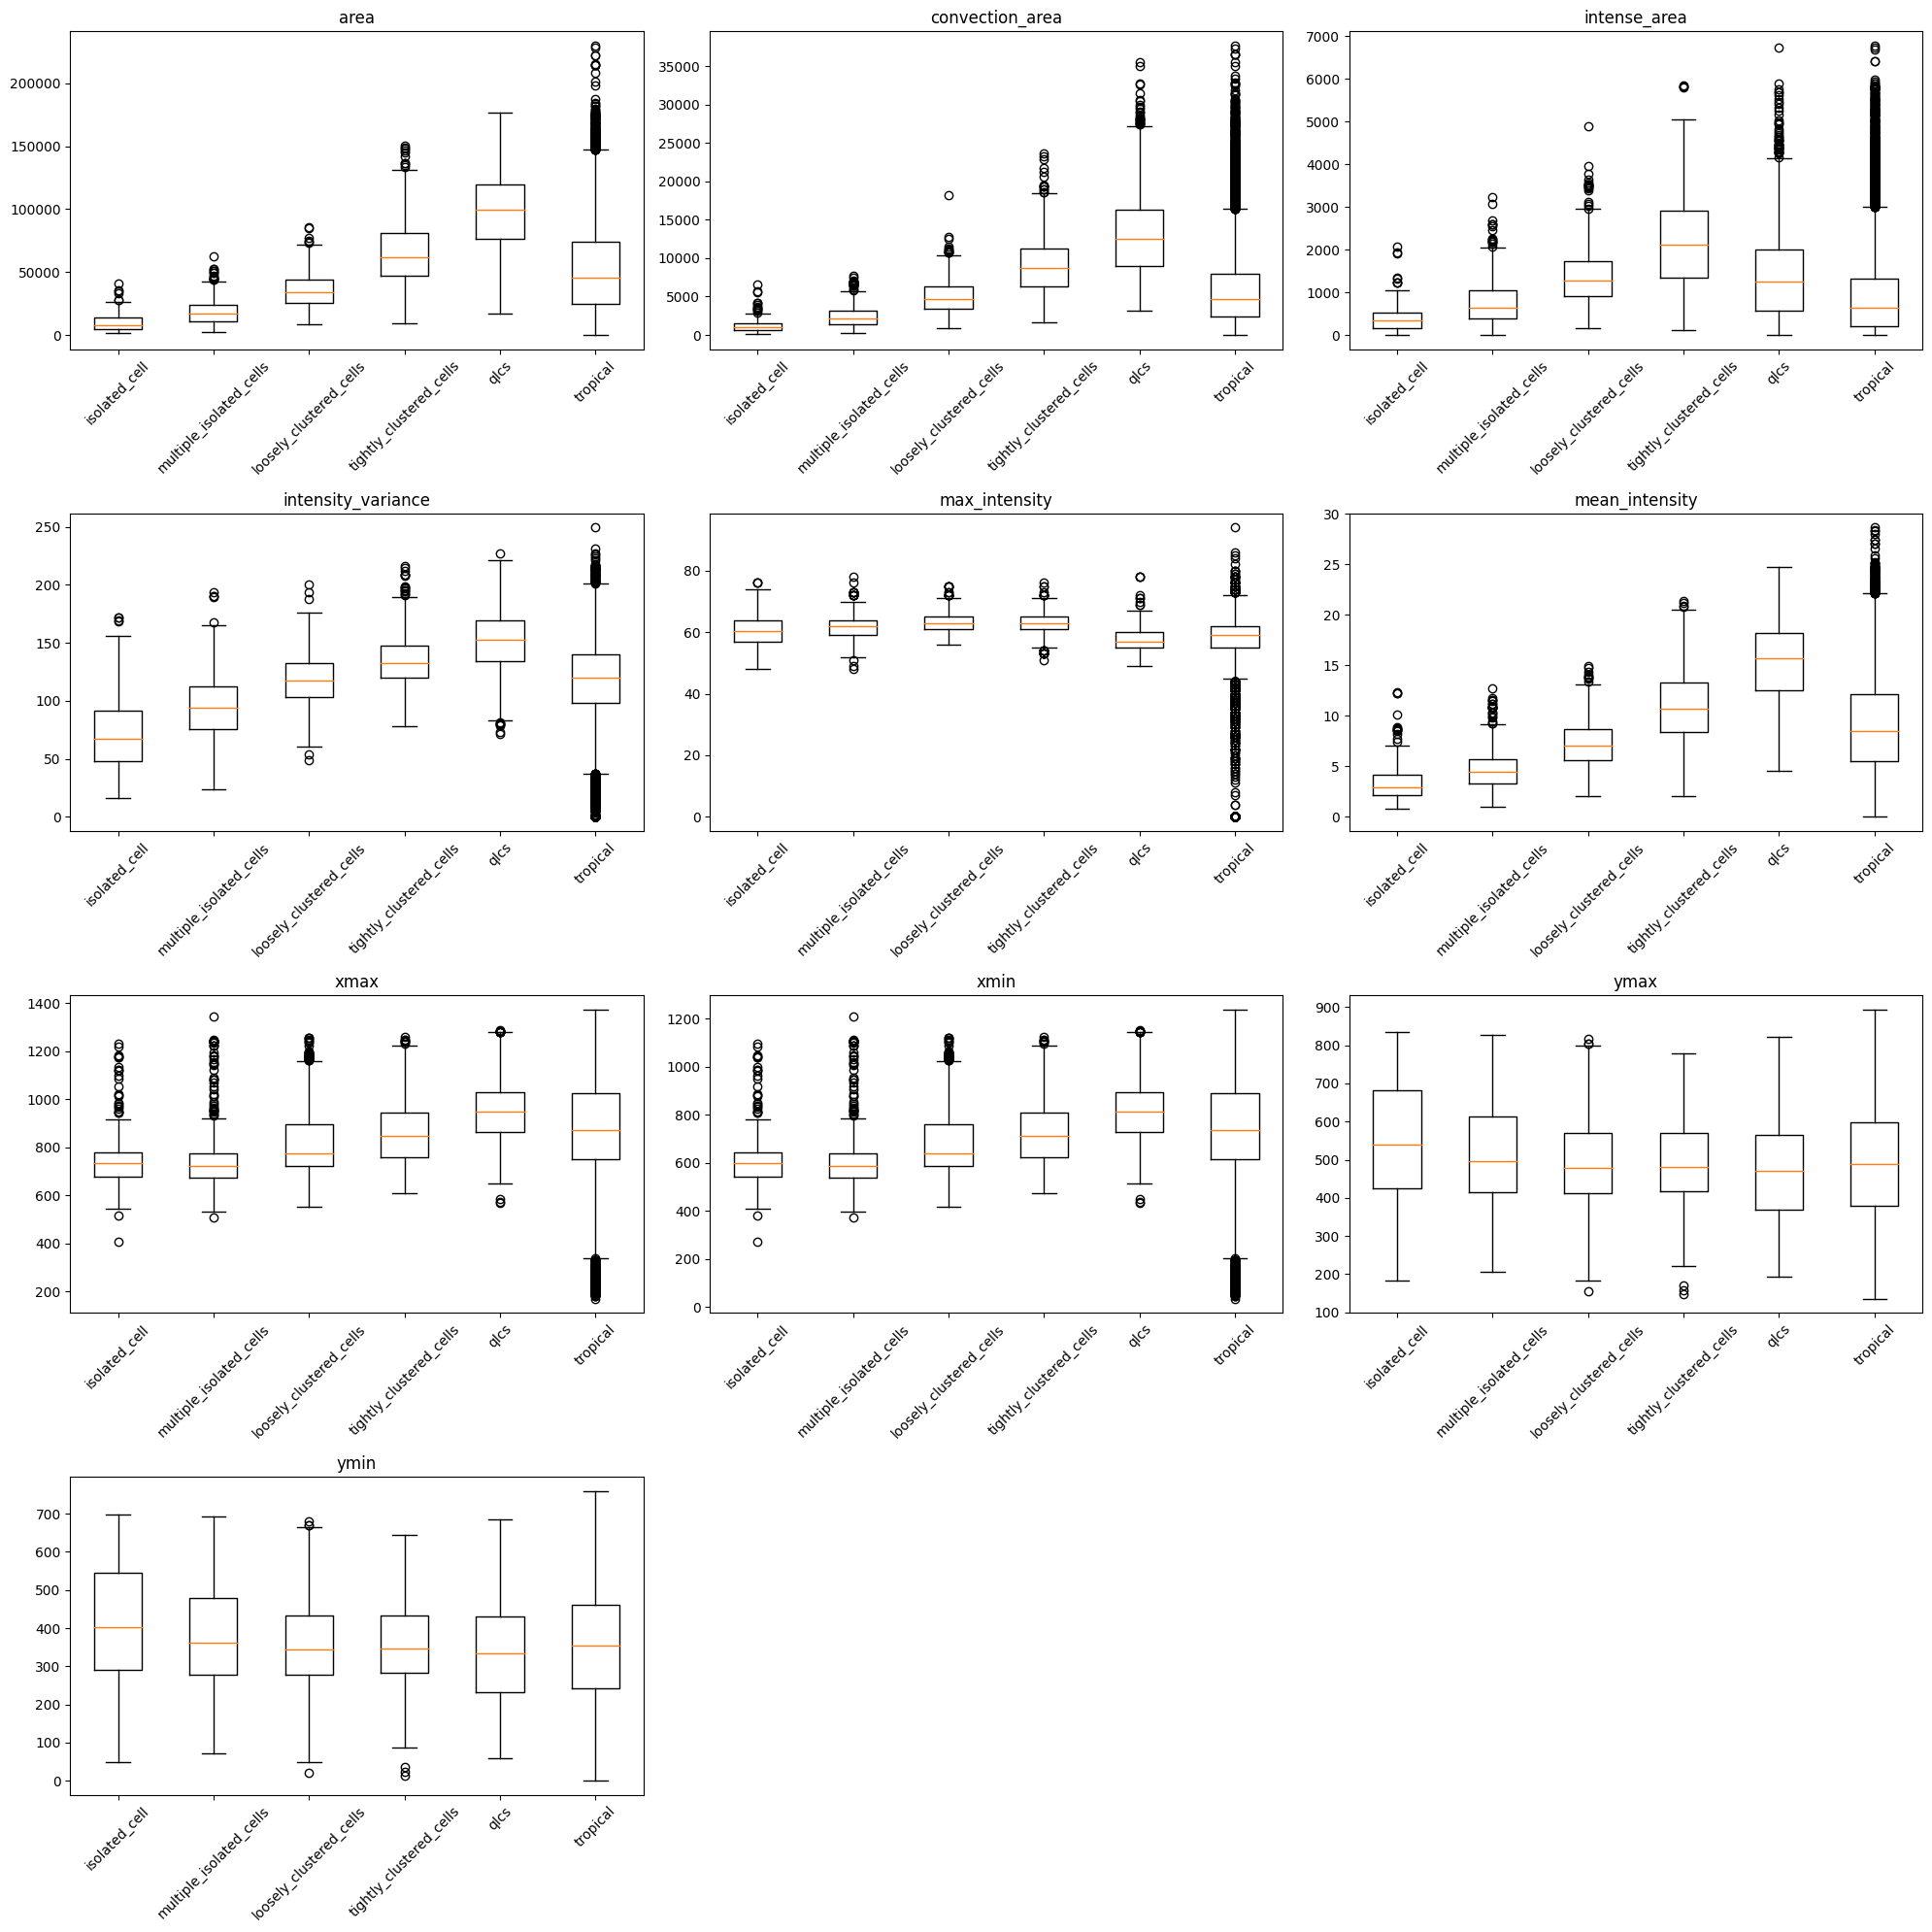

In [5]:
#create the boxplots of the attribute data
plt.rcParams['figure.figsize'] = 20, 20

vars = ['area', 'convection_area', 'intense_area', 'intensity_variance', 'max_intensity',
       'mean_intensity', 'xmax', 'xmin', 'ymax', 'ymin']

classes = ['isolated_cell', 'multiple_isolated_cells', 
                'loosely_clustered_cells', 'tightly_clustered_cells', 
                'qlcs', 'tropical']

for ax_num, var in enumerate(vars):

    ax = plt.subplot(4, 3, ax_num+1)

    sub_ = df_join[[var, 'Class Name']]

    all_data = df_not_subset[var]
    all_data = all_data.fillna(0)

    data = []
    
    for gid in classes[:-1]:
    
        data_ = sub_[sub_['Class Name'] == gid]
        
        data.append(data_[var].values)

    data.append(all_data.values)
        
    ax.boxplot(data, labels=classes)

    ax.set_title(var)

    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.tight_layout()

## Change Classifications

In [6]:
new_name = []
new_code = []

for rid, row in df_join.iterrows():
    if row['Class Code'] == 0 or row['Class Code'] == 1:
        new_name.append('Cellular')
        new_code.append(0)
        
    elif row['Class Code'] == 2 or row['Class Code'] == 3:
        new_name.append('Mixed Mode')
        new_code.append(1)
        
    elif row['Class Code'] == 4:
        new_name.append('Linear')
        new_code.append(2)
    
    elif row['Class Code'] == 5:
        new_name.append('Other')
        new_code.append(3)
        

df_join['New Code'] = new_code
df_join['New Name'] = new_name
df_join['year'] = [int(df_join.index.values[x][:4]) for x in range(len(df_join.index.values))]

<Axes: >

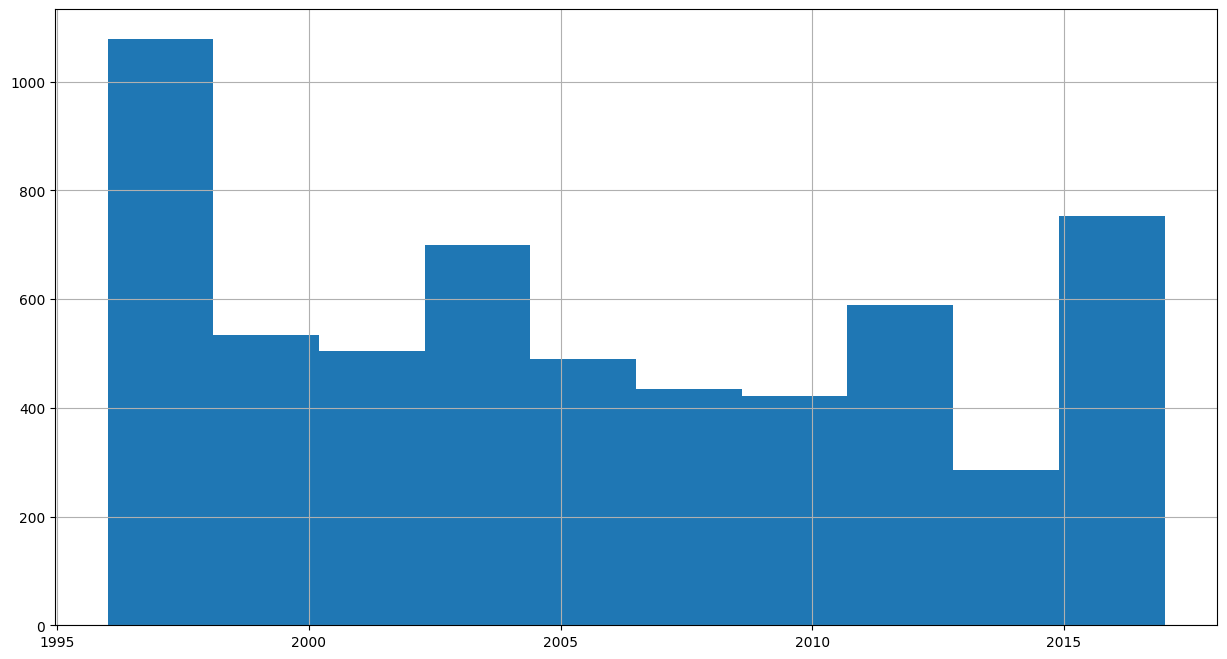

In [7]:
plt.rcParams['figure.figsize'] = 15, 8
df_join['year'].hist()

In [8]:
#Create training, testing, and validation datasets
Train = df_join[(df_join.year >= 1996) & (df_join.year <= 2011)].copy()
Test = df_join[(df_join.year >= 2014) & (df_join.year <= 2017)].copy()
Validation = df_join[(df_join.year >= 2012) & (df_join.year <= 2013)].copy()

In [9]:
print(Train.groupby(['New Name', 'year'])['New Code'].count().to_string())

New Name    year
Cellular    1996    116
            1997    100
            1998     92
            1999     98
            2000     59
            2001    105
            2002     52
            2003     44
            2004     97
            2005     63
            2006     18
            2007     32
            2008     44
            2009     68
            2010     45
            2011     36
Linear      1996     34
            1997     19
            1998     31
            1999     55
            2000     11
            2001     33
            2002     31
            2003     34
            2004     56
            2005     21
            2006     24
            2007     13
            2008     93
            2009     86
            2010     70
            2011    212
Mixed Mode  1996    195
            1997    118
            1998    200
            1999    181
            2000     62
            2001    110
            2002     87
            2003     92
            2004     72

In [10]:
Test.groupby(['New Name', 'year'])['New Code'].count()

New Name    year
Cellular    2014     26
            2015     48
            2016     35
            2017     33
Linear      2014     86
            2015     63
            2016     71
            2017    294
Mixed Mode  2014     50
            2015     41
            2016     29
            2017     31
Other       2014      6
            2016     12
            2017     95
Name: New Code, dtype: int64

In [11]:
Validation.groupby(['New Name', 'year'])['New Code'].count()

New Name    year
Cellular    2012    43
            2013    25
Linear      2012    37
            2013    70
Mixed Mode  2012    60
            2013    22
Other       2012    52
Name: New Code, dtype: int64

## Create New Pickles

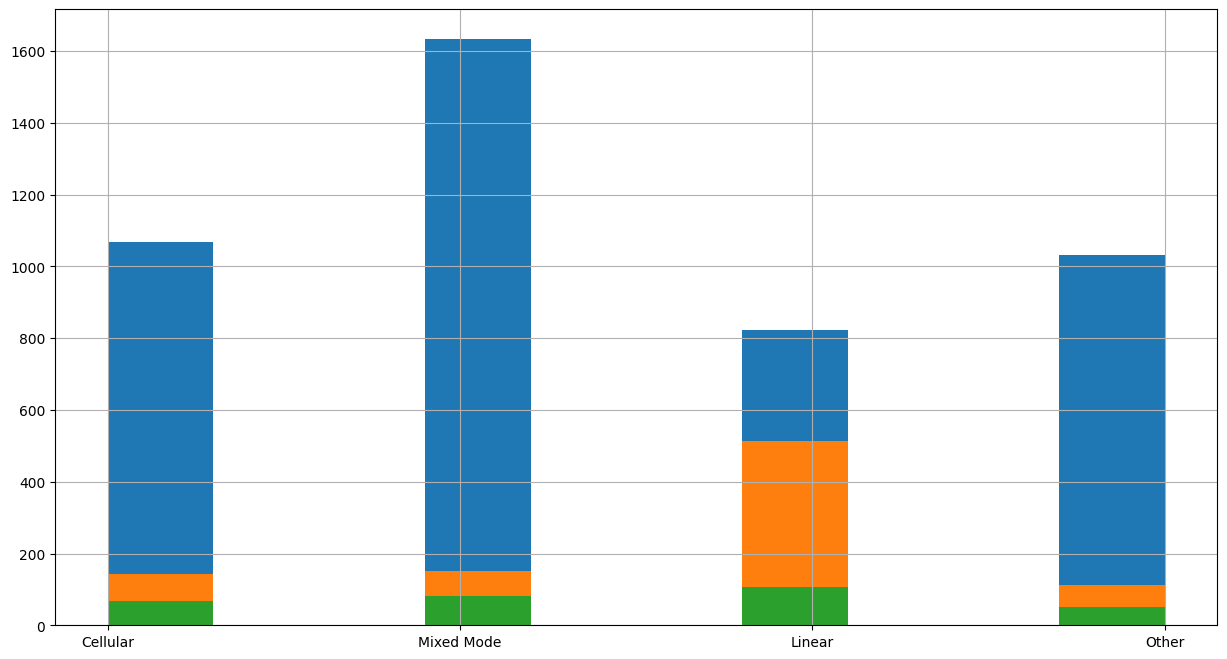

In [12]:
for name in ("Train", "Test", "Validation"):
    locals()[f'{name}']['New Name'].hist()

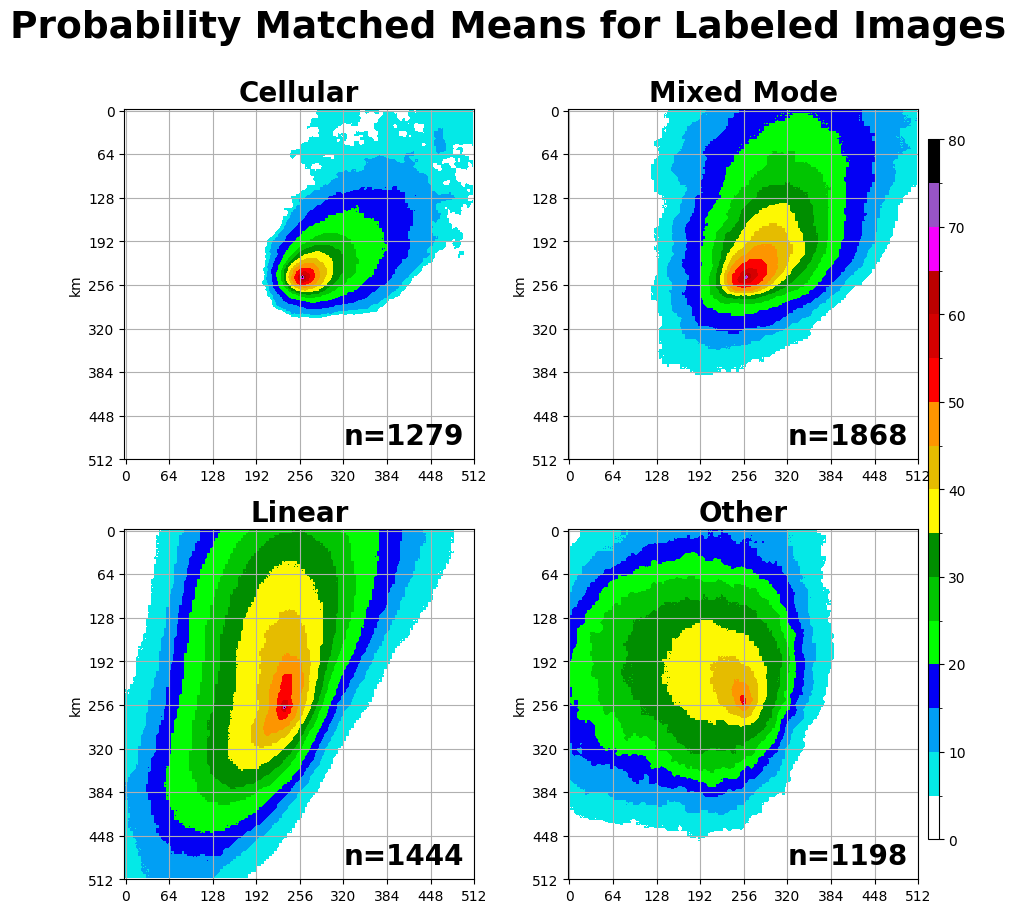

In [13]:
cmap, norm = radar_norm()

fig = plt.figure(figsize=(10.5,10))
plt.suptitle('Probability Matched Means for Labeled Images', size=27).set_weight('bold')
cbar_ax = fig.add_axes([0.9, 0.15, 0.01, 0.7])
#plt.subplots_adjust(right=0.8)

i=1

plt.tick_params(left = False, right = False , labelleft = False ,
                    labelbottom = False, bottom = False)

#
for cls in ['Cellular', 'Mixed Mode', 'Linear', 'Other']:
    class_ = df_join[df_join["New Name"]==cls].copy()
    image_data = []
    
    #
    for rid, row in class_.iterrows():

        # Open and append each image
        fname = f"/home/jcorner1/SVRIMG/data/tor/{row.year}/{row.filename[48:]}"   
        img = imageio.imread(fname, pilmode='P')
        image_data.append(img)

    #
    ax = plt.subplot(2, 2, i)
    mmp = ax.imshow(np.flipud(_run_pmm_one_variable(image_data)), cmap=cmap, norm=norm)
    
    #
    ax.text(85, 130, "n={}".format(len(image_data)), fontsize=20).set_weight('bold')
    ax.set_title(cls, fontsize=20).set_weight('bold')
    ax.set_yticks(list(range(0, 153, 17)))
    ax.set_yticklabels(np.arange(0,523,64))
    ax.set_xticks(list(range(0, 153, 17)))
    ax.set_xticklabels(np.arange(0,523,64))
    #ax.set_xlabel("km")
    ax.set_ylabel("km")
    ax.grid()
    
    
    i+= 1
    
plt.colorbar(mmp, ax=ax, pad=0.01, cax=cbar_ax)
plt.savefig('/home/jcorner1/Future_Modes/Plots/Probs_Match_means.png', format='png', dpi=500, bbox_inches='tight')
#plt.tight_layout()

/tmp/ipykernel_33766/522623361.py:17: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(3, 4, i)


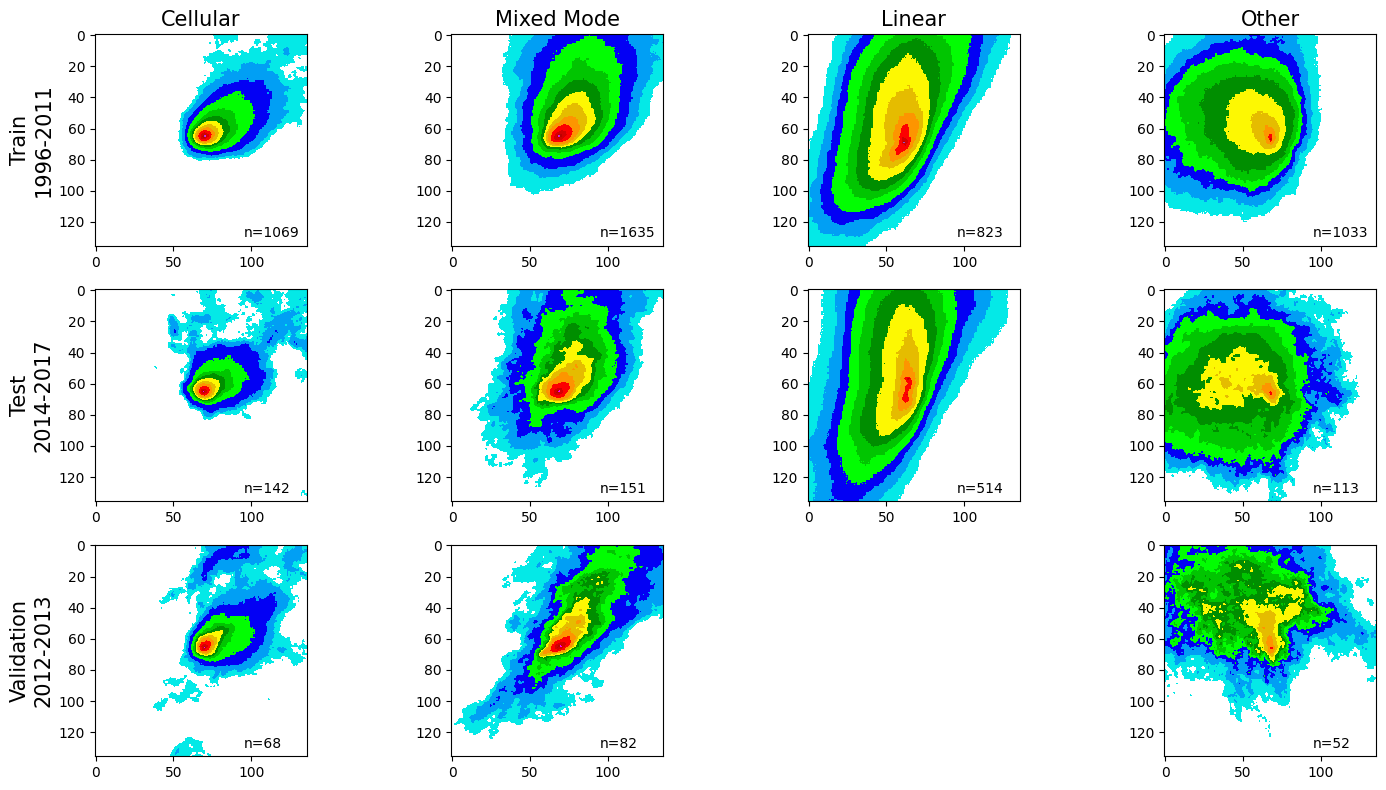

In [14]:
i = 1

for name in ("Train", "Test", "Validation"):
    sub_ = locals()[f'{name}']
    
    for cls in ['Cellular', 'Mixed Mode', 'Linear', 'Other']:
        class_ = sub_[sub_["New Name"]==cls].copy()
        image_data = []
        
        for rid, row in class_.iterrows():
            
            # Open and append each image
            fname = f"/home/jcorner1/SVRIMG/data/tor/{row.year}/{row.filename[48:]}"   
            img = imageio.imread(fname, pilmode='P')
            image_data.append(img)
            
        ax = plt.subplot(3, 4, i)
        mmp = ax.imshow(np.flipud(_run_pmm_one_variable(image_data)), cmap=cmap, norm=norm)
        #plt.colorbar(mmp, ax=ax, shrink=0.85, pad=0.01)
        ax.text(95, 130, "n={}".format(len(image_data)), fontsize=10)
        plt.tight_layout()
        
        if i <= 4:
            ax.set_title(cls, fontsize=15)
            
        if i in [1,5,9]:
            ax.set_ylabel(name + "\n{}-{}".format(np.min(sub_['year'].values), np.max(sub_['year'].values)), fontsize=15)
        i += 1
        
    plt.tight_layout()

In [15]:
for name in ("Train", "Test", "Validation"):
    sub_ = locals()[f'{name}']
    image_data = []
    
    # Iterate through each row of the dataframe 
    for rid, row in sub_.iterrows():

        # Open and append each image
        fname = f"/home/jcorner1/SVRIMG/data/tor/{row.year}/{row.filename[48:]}"   
        img = imageio.imread(fname, pilmode='P')
        image_data.append(img)

        # Expand the dimensions and save the labels
        imgs = np.expand_dims(np.array(image_data), axis=3)
        classes_ = sub_['New Code'].values

        # Dump to a pickle file for later use
        pickle.dump([imgs, classes_], open(f'/home/scratch/jcorner1/Thesis/data/new_mode_svrimg/svrimg_new_mode_{name}.pkl', 'wb'))
    print(name)

Train
Test
Validation
